In [1]:
%matplotlib inline

## [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation)
- Creates clusters by exchanging messages between sample pairs until convergence.
- The messages represent the "suitability" for one sample to be an "exemplar" (a most representative example) of the other.
- AP chooses the number of clusters based on the data.
- Two key params: ```preference``` (how many exemplars), and ```damping factor``` (lessens risk of oscillations).
- Main drawbacks: time complexity: $O(N^2 T)$ and memory complexity $O(N^2)$ (if a dense matrix is used).

## Example: AP, artificial dataset, 3 classes

/home/bjpcjp/.local/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


Estimated #clusters: 3
Homogeneity:         0.872
Completeness:        0.872
V-measure:           0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Info: 0.871
Silhouette Coef:      0.753


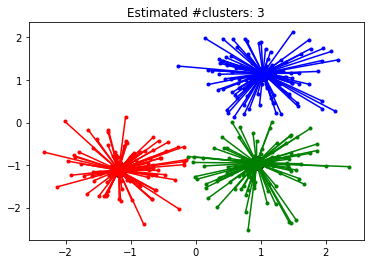

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

centers        = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples   = 300, 
                            centers     = centers, 
                            cluster_std = 0.5,
                            random_state=0)

af                      = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels                  = af.labels_
n_clusters_             = len(cluster_centers_indices)

print('Estimated #clusters: %d' % n_clusters_)
print("Homogeneity:         %0.3f"               % metrics.homogeneity_score(labels_true, labels))
print("Completeness:        %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure:           %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Info: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coef:      %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members  = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    
    plt.plot(X[class_members, 0], 
             X[class_members, 1], col + '.')
    
    plt.plot(cluster_center[0], 
             cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)

plt.title('Estimated #clusters: %d' % n_clusters_)
plt.show()